In [ ]:
!pip install fastai==2.4.0

     |████████████████████████████████| 187 kB 4.3 MB/s 
     |████████████████████████████████| 831.4 MB 7.1 kB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 23.3 MB 1.9 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
#from fastai.vision.all import *
#from fastai.callback import SaveModelCallback

from fastai import *
from fastai.vision.all import *
from fastai.callback import *

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
batch_size = 8
im_height = 450
im_width = 600
epochs = 10

In [ ]:
# path = Path('/drive/MyDrive/CADx project /Challenge 2') # Define path to the image folders
# Path to dataset files with pre-processing (hair-removed)
path = '/drive/MyDrive/CADx project /Challenges/cad/cad2'

#Get image files from the folders 
image_files = get_image_files(path, recurse=True, folders = ["train","val"] )

#Create datablocks with transformations
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter= GrandparentSplitter(train_name= 'train', valid_name='val'),
                   get_y = parent_label,
                   item_tfms = [Resize((im_height,im_width), method = ResizeMethod.Squish)])


#Data loader with bs 
dls = dblock.dataloaders(path, bs= batch_size, verbose=True)

Found 2736 items
2 datasets of sizes 2010,500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (600, 450), 'method': 'squish', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}


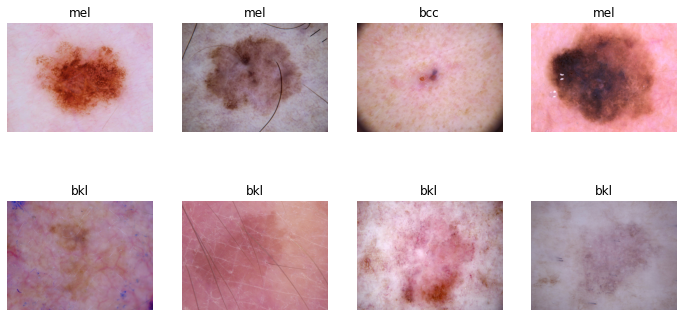

In [ ]:
#Visualize a batch
dls.show_batch()

Main module which runs all the models one by one that are present in the model_list 


Metrrics : Accuracy and error rate

Callbacks : ShowGraph - To show loss curve as the model is trained 
            
            SaveModel - Save the best model monitoring Val loss
            
            Early Stopping - Terminate the run early if the val loss doesnot decrease by a specific margin by 3 epochs

-----Training model: 1 : <function resnet18 at 0x7f06693ee290>--------


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.401651,0.903984,0.350000,0.650000,01:41
1,1.262377,0.792670,0.284000,0.716000,00:24
2,0.998361,0.642320,0.256000,0.744000,00:24
3,0.869763,0.639411,0.264000,0.736000,00:24
4,0.743067,0.640445,0.294000,0.706000,00:24
5,0.656020,0.554127,0.224000,0.776000,00:25
6,0.562371,0.541631,0.222000,0.778000,00:24
7,0.529570,0.538350,0.220000,0.780000,00:24
8,0.549018,0.485096,0.196000,0.804000,00:24
9,0.515213,0.500837,0.198000,0.802000,00:24


Better model found at epoch 0 with valid_loss value: 0.903984010219574.


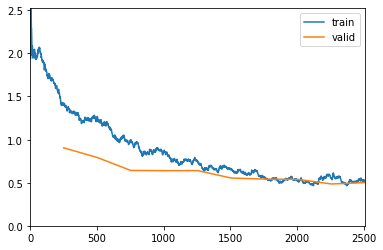

Better model found at epoch 1 with valid_loss value: 0.7926698923110962.
Better model found at epoch 2 with valid_loss value: 0.6423195600509644.
Better model found at epoch 3 with valid_loss value: 0.6394110918045044.
Better model found at epoch 5 with valid_loss value: 0.5541273951530457.
Better model found at epoch 6 with valid_loss value: 0.541630744934082.
Better model found at epoch 7 with valid_loss value: 0.5383504033088684.
Better model found at epoch 8 with valid_loss value: 0.4850963354110718.
-----Training of model 1 complete----
-----Training model: 2 : <function resnet34 at 0x7f06693ee320>--------


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.479247,0.986600,0.404000,0.596000,00:36
1,1.243349,0.730845,0.306000,0.694000,00:36
2,0.967622,0.748669,0.302000,0.698000,00:36
3,0.856686,0.597644,0.248000,0.752000,00:36
4,0.716180,0.574685,0.246000,0.754000,00:36
5,0.655093,0.509427,0.212000,0.788000,00:36
6,0.587903,0.505989,0.212000,0.788000,00:36
7,0.561225,0.487425,0.184000,0.816000,00:36
8,0.525418,0.497721,0.198000,0.802000,00:36
9,0.495046,0.475946,0.198000,0.802000,00:36


Better model found at epoch 0 with valid_loss value: 0.9866001605987549.


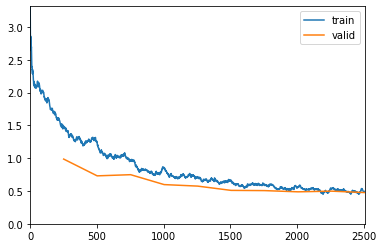

Better model found at epoch 1 with valid_loss value: 0.7308449149131775.
Better model found at epoch 3 with valid_loss value: 0.5976444482803345.
Better model found at epoch 4 with valid_loss value: 0.5746845006942749.
Better model found at epoch 5 with valid_loss value: 0.509427011013031.
Better model found at epoch 6 with valid_loss value: 0.5059894323348999.
Better model found at epoch 7 with valid_loss value: 0.48742473125457764.
Better model found at epoch 9 with valid_loss value: 0.47594591975212097.
-----Training of model 2 complete----
-----Training model: 3 : <function resnet50 at 0x7f06693ee3b0>--------


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.435031,0.882268,0.322000,0.678000,01:04
1,1.211145,0.891061,0.340000,0.660000,01:02
2,0.968242,0.704055,0.288000,0.712000,01:02
3,0.758581,0.593830,0.242000,0.758000,01:02
4,0.639999,0.560292,0.224000,0.776000,01:02
5,0.534076,0.466806,0.192000,0.808000,01:02
6,0.492723,0.459602,0.182000,0.818000,01:02
7,0.406706,0.425327,0.160000,0.840000,01:02
8,0.392382,0.448501,0.186000,0.814000,01:02
9,0.385911,0.434388,0.182000,0.818000,01:02


Better model found at epoch 0 with valid_loss value: 0.8822683691978455.


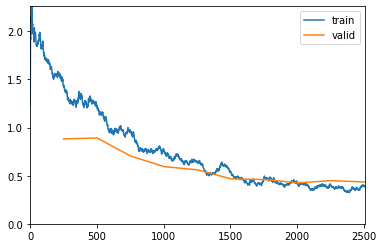

Better model found at epoch 2 with valid_loss value: 0.7040553092956543.
Better model found at epoch 3 with valid_loss value: 0.5938304662704468.
Better model found at epoch 4 with valid_loss value: 0.560291588306427.
Better model found at epoch 5 with valid_loss value: 0.4668063521385193.
Better model found at epoch 6 with valid_loss value: 0.45960232615470886.
Better model found at epoch 7 with valid_loss value: 0.425326943397522.
-----Training of model 3 complete----
-----Training model: 4 : <function resnet101 at 0x7f06693ee440>--------


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.460507,1.317642,0.362000,0.638000,01:44
1,1.145475,1.478796,0.314000,0.686000,01:43
2,0.898304,1.123471,0.304000,0.696000,01:44


Better model found at epoch 0 with valid_loss value: 1.3176418542861938.


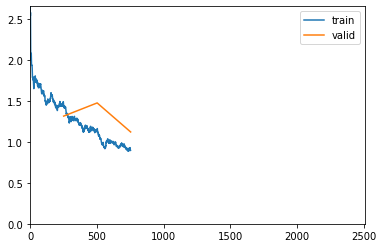

Better model found at epoch 2 with valid_loss value: 1.1234709024429321.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.460507,1.317642,0.362000,0.638000,01:44
1,1.145475,1.478796,0.314000,0.686000,01:43
2,0.898304,1.123471,0.304000,0.696000,01:44
3,0.742728,0.834369,0.268000,0.732000,01:44
4,0.571538,0.691072,0.238000,0.762000,01:44
5,0.559454,0.568727,0.204000,0.796000,01:44
6,0.487582,0.850527,0.222000,0.778000,01:44
7,0.394332,0.689824,0.222000,0.778000,01:44
8,0.348970,0.833901,0.184000,0.816000,01:44
9,0.367963,1.177442,0.208000,0.792000,01:44


Better model found at epoch 3 with valid_loss value: 0.834368884563446.


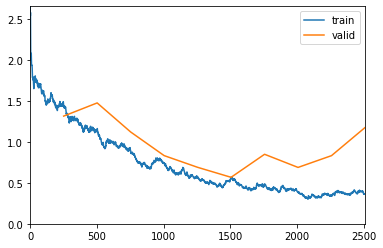

Better model found at epoch 4 with valid_loss value: 0.6910720467567444.
Better model found at epoch 5 with valid_loss value: 0.5687273740768433.
-----Training of model 4 complete----
-----Training model: 5 : <function resnet152 at 0x7f06693d3320>--------


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.399776,0.932018,0.356000,0.644000,02:29
1,1.092144,0.938593,0.348000,0.652000,02:29
2,0.870948,0.680709,0.262000,0.738000,02:29
3,0.642011,0.566844,0.222000,0.778000,02:29
4,0.559172,0.480456,0.198000,0.802000,02:29
5,0.444062,0.477879,0.206000,0.794000,02:29
6,0.403951,0.415469,0.162000,0.838000,02:29
7,0.371179,0.427093,0.156000,0.844000,02:29
8,0.324304,0.410272,0.172000,0.828000,02:29
9,0.302655,0.419621,0.178000,0.822000,02:29


Better model found at epoch 0 with valid_loss value: 0.932017982006073.


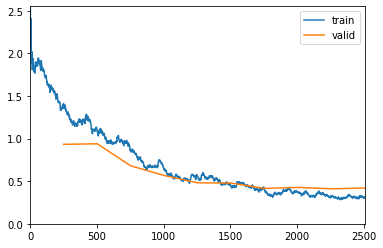

Better model found at epoch 2 with valid_loss value: 0.6807087063789368.
Better model found at epoch 3 with valid_loss value: 0.5668440461158752.
Better model found at epoch 4 with valid_loss value: 0.4804559350013733.
Better model found at epoch 5 with valid_loss value: 0.47787928581237793.
Better model found at epoch 6 with valid_loss value: 0.415468692779541.
Better model found at epoch 8 with valid_loss value: 0.41027191281318665.
-----Training of model 5 complete----
-----Training model: 6 : <function densenet121 at 0x7f0668cb9560>--------


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.397548,0.810934,0.344000,0.656000,01:15
1,1.110200,0.735196,0.304000,0.696000,01:14
2,0.790003,0.651048,0.258000,0.742000,01:13
3,0.737269,0.548294,0.238000,0.762000,01:13
4,0.603659,0.502542,0.192000,0.808000,01:13
5,0.437961,0.474715,0.196000,0.804000,01:13
6,0.466523,0.403335,0.172000,0.828000,01:14
7,0.479340,0.429512,0.170000,0.830000,01:14
8,0.348287,0.400925,0.158000,0.842000,01:13
9,0.339318,0.428344,0.174000,0.826000,01:13


Better model found at epoch 0 with valid_loss value: 0.8109338283538818.


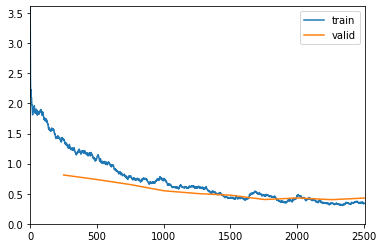

Better model found at epoch 1 with valid_loss value: 0.7351956963539124.
Better model found at epoch 2 with valid_loss value: 0.6510478258132935.
Better model found at epoch 3 with valid_loss value: 0.5482937097549438.
Better model found at epoch 4 with valid_loss value: 0.5025421977043152.
Better model found at epoch 5 with valid_loss value: 0.47471463680267334.
Better model found at epoch 6 with valid_loss value: 0.403335303068161.
Better model found at epoch 8 with valid_loss value: 0.4009253978729248.
-----Training of model 6 complete----
-----Training model: 7 : <function densenet169 at 0x7f0668cb9680>--------


Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.438551,0.866924,0.358000,0.642000,01:35
1,1.163157,0.853358,0.276000,0.724000,01:32
2,0.884080,0.659272,0.278000,0.722000,01:32
3,0.687607,0.491088,0.194000,0.806000,01:32
4,0.575334,0.477562,0.194000,0.806000,01:33
5,0.469156,0.429389,0.178000,0.822000,01:34
6,0.438369,0.405039,0.156000,0.844000,01:34
7,0.341027,0.390920,0.152000,0.848000,01:34
8,0.304073,0.371187,0.156000,0.844000,01:34
9,0.295885,0.363046,0.146000,0.854000,01:34


Better model found at epoch 0 with valid_loss value: 0.8669235110282898.


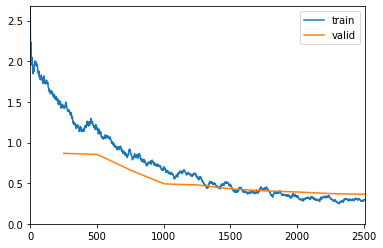

Better model found at epoch 1 with valid_loss value: 0.8533580303192139.
Better model found at epoch 2 with valid_loss value: 0.6592717170715332.
Better model found at epoch 3 with valid_loss value: 0.491087943315506.
Better model found at epoch 4 with valid_loss value: 0.4775616526603699.
Better model found at epoch 5 with valid_loss value: 0.42938923835754395.
Better model found at epoch 6 with valid_loss value: 0.4050394892692566.
Better model found at epoch 7 with valid_loss value: 0.39091965556144714.
Better model found at epoch 8 with valid_loss value: 0.3711867332458496.
Better model found at epoch 9 with valid_loss value: 0.36304596066474915.
-----Training of model 7 complete----
-----Training model: 8 : <function densenet201 at 0x7f0668cb9710>--------


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.364863,0.911427,0.334000,0.666000,02:00
1,1.120630,0.845028,0.332000,0.668000,01:58
2,0.861560,0.607289,0.254000,0.746000,01:58
3,0.705048,0.565787,0.236000,0.764000,01:58
4,0.523519,0.493360,0.212000,0.788000,01:58
5,0.496289,0.436805,0.186000,0.814000,01:58
6,0.321489,0.426965,0.180000,0.820000,01:58
7,0.312331,0.399322,0.170000,0.830000,01:58
8,0.254517,0.348682,0.150000,0.850000,01:58
9,0.301204,0.354734,0.142000,0.858000,01:58


Better model found at epoch 0 with valid_loss value: 0.9114270210266113.


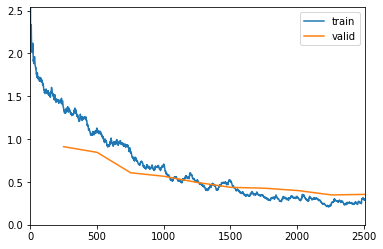

Better model found at epoch 1 with valid_loss value: 0.845027506351471.
Better model found at epoch 2 with valid_loss value: 0.6072890758514404.
Better model found at epoch 3 with valid_loss value: 0.5657868981361389.
Better model found at epoch 4 with valid_loss value: 0.4933595359325409.
Better model found at epoch 5 with valid_loss value: 0.4368046820163727.
Better model found at epoch 6 with valid_loss value: 0.42696475982666016.
Better model found at epoch 7 with valid_loss value: 0.39932185411453247.
Better model found at epoch 8 with valid_loss value: 0.3486822247505188.
-----Training of model 8 complete----
-----Training model: 9 : <function densenet161 at 0x7f0668cb95f0>--------


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.350200,0.829248,0.312000,0.688000,02:28
1,1.057417,0.694473,0.264000,0.736000,02:22
2,0.802252,0.774138,0.256000,0.744000,02:22
3,0.544441,0.443731,0.178000,0.822000,02:22
4,0.554419,0.412503,0.172000,0.828000,02:22
5,0.424113,0.392939,0.154000,0.846000,02:22
6,0.310442,0.348226,0.142000,0.858000,02:22
7,0.261717,0.329453,0.120000,0.880000,02:22
8,0.244074,0.341125,0.136000,0.864000,02:22
9,0.249146,0.326898,0.130000,0.870000,02:22


Better model found at epoch 0 with valid_loss value: 0.8292481303215027.


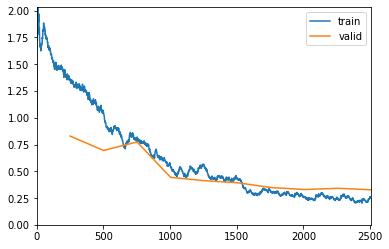

Better model found at epoch 1 with valid_loss value: 0.6944729685783386.
Better model found at epoch 3 with valid_loss value: 0.4437312185764313.
Better model found at epoch 4 with valid_loss value: 0.41250279545783997.
Better model found at epoch 5 with valid_loss value: 0.3929387629032135.
Better model found at epoch 6 with valid_loss value: 0.34822574257850647.
Better model found at epoch 7 with valid_loss value: 0.32945317029953003.
Better model found at epoch 9 with valid_loss value: 0.3268983066082001.
-----Training of model 9 complete----
-----Training model: 10 : <function vgg16_bn at 0x7f06693eecb0>--------


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.487000,0.939701,0.384000,0.616000,01:45
1,1.196076,0.719861,0.300000,0.700000,01:43
2,0.961474,0.718930,0.300000,0.700000,01:43
3,0.830967,0.629939,0.284000,0.716000,01:43
4,0.788709,0.598135,0.250000,0.750000,01:42
5,0.658408,0.572579,0.240000,0.760000,01:42
6,0.611522,0.538514,0.214000,0.786000,01:43
7,0.538285,0.556896,0.226000,0.774000,01:43
8,0.515559,0.518295,0.220000,0.780000,01:43
9,0.483599,0.529104,0.230000,0.770000,01:42


Better model found at epoch 0 with valid_loss value: 0.9397011995315552.


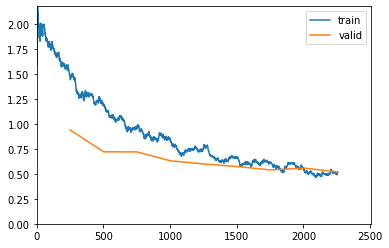

Better model found at epoch 1 with valid_loss value: 0.7198606133460999.
Better model found at epoch 2 with valid_loss value: 0.7189300656318665.
Better model found at epoch 3 with valid_loss value: 0.6299393177032471.
Better model found at epoch 4 with valid_loss value: 0.5981346368789673.
Better model found at epoch 5 with valid_loss value: 0.5725786089897156.
Better model found at epoch 6 with valid_loss value: 0.538513720035553.
Better model found at epoch 8 with valid_loss value: 0.5182953476905823.
No improvement since epoch 6: early stopping
-----Training of model 10 complete----
-----Training model: 11 : <function vgg19_bn at 0x7f06693eedd0>--------


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.541026,0.923544,0.410000,0.590000,02:00
1,1.206920,0.763086,0.304000,0.696000,02:00
2,0.852867,0.752517,0.334000,0.666000,02:00
3,0.822405,0.597109,0.262000,0.738000,02:00
4,0.731974,0.563174,0.230000,0.770000,02:00
5,0.623033,0.566554,0.240000,0.760000,02:00
6,0.636543,0.523170,0.220000,0.780000,02:00
7,0.545296,0.518291,0.234000,0.766000,02:00
8,0.517651,0.512491,0.214000,0.786000,02:00
9,0.481241,0.497636,0.198000,0.802000,02:00


Better model found at epoch 0 with valid_loss value: 0.9235444664955139.


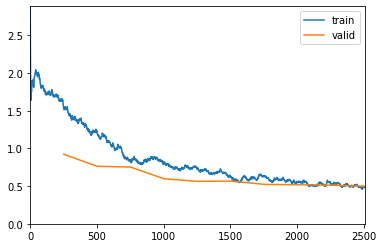

Better model found at epoch 1 with valid_loss value: 0.7630855441093445.
Better model found at epoch 2 with valid_loss value: 0.752516508102417.
Better model found at epoch 3 with valid_loss value: 0.597108781337738.
Better model found at epoch 4 with valid_loss value: 0.5631738305091858.
Better model found at epoch 6 with valid_loss value: 0.5231701135635376.
Better model found at epoch 7 with valid_loss value: 0.5182905197143555.
Better model found at epoch 8 with valid_loss value: 0.5124911665916443.
Better model found at epoch 9 with valid_loss value: 0.4976361393928528.
-----Training of model 11 complete----
-----Training model: 12 : <function alexnet at 0x7f06693dec20>--------


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.495917,1.001207,0.412000,0.588000,00:21
1,1.141558,0.830984,0.332000,0.668000,00:20
2,0.980949,0.755738,0.310000,0.690000,00:20
3,0.878352,0.715568,0.296000,0.704000,00:20
4,0.753455,0.670307,0.292000,0.708000,00:20
5,0.730035,0.614591,0.268000,0.732000,00:20
6,0.716527,0.582100,0.258000,0.742000,00:20
7,0.706994,0.565827,0.250000,0.750000,00:20
8,0.592142,0.557254,0.244000,0.756000,00:20
9,0.629385,0.558208,0.250000,0.750000,00:20


Better model found at epoch 0 with valid_loss value: 1.0012071132659912.


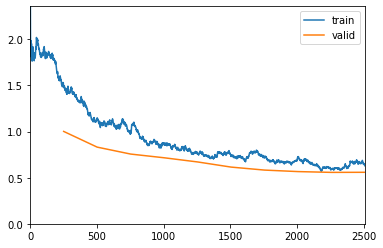

Better model found at epoch 1 with valid_loss value: 0.8309841156005859.
Better model found at epoch 2 with valid_loss value: 0.755737841129303.
Better model found at epoch 3 with valid_loss value: 0.7155683040618896.
Better model found at epoch 4 with valid_loss value: 0.6703073978424072.
Better model found at epoch 5 with valid_loss value: 0.6145908236503601.
Better model found at epoch 6 with valid_loss value: 0.5821002721786499.
Better model found at epoch 7 with valid_loss value: 0.5658273100852966.
Better model found at epoch 8 with valid_loss value: 0.5572536587715149.
-----Training of model 12 complete----


In [ ]:
# Build the CNN model with the pretrained resnet34

# ############# Change the model HERE ############################
# learn = cnn_learner(dls, vgg16_bn, metrics = [accuracy, error_rate])

# ##############Change the path name HERE ###################################
# save_path = '/drive/MyDrive/CADx project /Challenges/cad/cad2/outout_models/vgg16_best_bs16'
# learn.fit_one_cycle(10, 1e-3, cbs=[ShowGraphCallback(),EarlyStoppingCallback(monitor='accuracy', min_delta=0.001, patience=3), SaveModelCallback( monitor = 'valid_loss' , fname = save_path)])

model_list = [resnet18, resnet34, resnet50, resnet101, resnet152, densenet121, densenet169, densenet201, densenet161, vgg16_bn, vgg19_bn, alexnet] ##List of Models . You can add resnet ones in the mix
nmodels = 12
for i in range(nmodels):
  print(f'-----Training model: {i+1} : {model_list[i]}--------')
             
  learn = cnn_learner(dls, model_list[i], metrics=[error_rate, accuracy])
  save_path = '/drive/MyDrive/CADx project /Challenges/cad/cad2/output_models/' + str(model_list[i])
  #learn_ensemble.recorder.plot(suggestion=True)
  learn.fit_one_cycle(10,slice(1e-3), cbs=[ShowGraphCallback(),EarlyStoppingCallback(monitor='accuracy', min_delta=0.001, patience=3), SaveModelCallback( monitor = 'valid_loss' , fname = save_path )])  
  # learn.lr_find()      
  print(f'-----Training of model {i+1} complete----')      

To read the test dataset and predict upon them 

In [ ]:
import numpy as np
import cv2
import torch
import tensorflow as tf

In [ ]:
from google.colab import files

#Set test folder path 
test_path = "/drive/MyDrive/CADx project /Challenges/cad/test"

#Set variables 
img_size = None
predictions = []
predi = []

#Read images through the folder and extract features from them 
file_list = os.listdir(test_path)
sorted_files = sorted(file_list)
print(sorted_files)
print(len(sorted_files))
print(len(file_list))                             # Print the number of images present for later reference in prediction file 
for filename in sorted_files:
  img = cv2.imread(os.path.join(test_path, filename))
  preds, y, losses = learn.predict(img) 
  y_array = y.numpy()
  print(y_array)        
  predictions.append(y_array)
  predi.append(preds) 

['xxx0001.jpg', 'xxx0002.jpg', 'xxx0003.jpg', 'xxx0004.jpg', 'xxx0005.jpg', 'xxx0006.jpg', 'xxx0007.jpg', 'xxx0008.jpg', 'xxx0009.jpg', 'xxx0010.jpg', 'xxx0011.jpg', 'xxx0012.jpg', 'xxx0013.jpg', 'xxx0014.jpg', 'xxx0015.jpg', 'xxx0016.jpg', 'xxx0017.jpg', 'xxx0018.jpg', 'xxx0019.jpg', 'xxx0020.jpg', 'xxx0021.jpg', 'xxx0022.jpg', 'xxx0023.jpg', 'xxx0024.jpg', 'xxx0025.jpg', 'xxx0026.jpg', 'xxx0027.jpg', 'xxx0028.jpg', 'xxx0029.jpg', 'xxx0030.jpg', 'xxx0031.jpg', 'xxx0032.jpg', 'xxx0033.jpg', 'xxx0034.jpg', 'xxx0035.jpg', 'xxx0036.jpg', 'xxx0037.jpg', 'xxx0038.jpg', 'xxx0039.jpg', 'xxx0040.jpg', 'xxx0041.jpg', 'xxx0042.jpg', 'xxx0043.jpg', 'xxx0044.jpg', 'xxx0045.jpg', 'xxx0046.jpg', 'xxx0047.jpg', 'xxx0048.jpg', 'xxx0049.jpg', 'xxx0050.jpg', 'xxx0051.jpg', 'xxx0052.jpg', 'xxx0053.jpg', 'xxx0054.jpg', 'xxx0055.jpg', 'xxx0056.jpg', 'xxx0057.jpg', 'xxx0058.jpg', 'xxx0059.jpg', 'xxx0060.jpg', 'xxx0061.jpg', 'xxx0062.jpg', 'xxx0063.jpg', 'xxx0064.jpg', 'xxx0065.jpg', 'xxx0066.jpg', 'xxx0067.

1


1


2


1


1


1


2


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


0


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


1


2


1


1


1


1


1


1


1


1


1


1


1


1


1


In [ ]:
print(predictions)
# final_pred = predictions.numpy()
# print(final_pred)

[array(1), array(1), array(2), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1),

In [ ]:
#Save to final output document 
pd.DataFrame(y_array).to_csv("/drive/MyDrive/CADx project /Challenges/cad/final_output/challenge2_predictions.csv")